In [2]:
import calendar
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
COLORS = ['#7DFB6D', '#C7B815', '#D4752E', '#C7583F','#d64161', '#86af49', '#c1946a',
          '#92a8d1','#563f46', '#96897f', '#7e4a35', '#c1502e','#587e76', '#87bdd8',
          '#D4752E','#c83349','#7DFB6D', '#C7B815', '#622569']

In [4]:
data=pd.read_csv('AllBirdsv4.csv')
data.shape

,File ID,English_name,Vocalization_type,Quality,Time,Date,X,Y
0,402254,Rose-crested Blue Pipit,call,no score,13:30,2/8/2018,49,63
1,406171,Rose-crested Blue Pipit,call,A,7:48,6/7/2017,125,133
2,405901,Rose-crested Blue Pipit,call,A,12:00,2/8/2018,58,76
3,405548,Rose-crested Blue Pipit,song,A,11:00,3/10/2018,55,125
4,401782,Rose-crested Blue Pipit,song,A,6:00,6/29/2008,129,123


In [5]:
bird_names = pd.unique(data.English_name).tolist()

dumping_site = (148,159)
data['Y']=data['Y'].str.replace('?', '')
data['Y']=pd.to_numeric(data['Y'], errors='ignore')

format1 = pd.to_datetime(data['Date'], errors = 'coerce', format = "%m/%d/%Y").dropna()
format2 = pd.to_datetime(data['Date'], errors = 'coerce', format = "%Y-%m-%d").dropna()
format3 = pd.to_datetime(data['Date'], errors = 'coerce', format = "%Y-%m-00").dropna()


data = data.drop(columns=['Date'])


data['Date'] = pd.concat([format1,format2,format3], axis = 0)
data =data[~data['Date'].isna()]



In [7]:
colors =[COLORS[bird_names.index(i)] for i in data.English_name.values.tolist()]
data['color'] = colors

In [29]:
c = pd.to_datetime(data['Date'], errors = 'coerce', format = "%Y-%m-00").dropna()
n = c.map(lambda x: x.year)
data["Date"]=n

In [75]:
data["Vocalization_type"]=  data["Vocalization_type"].str.upper()

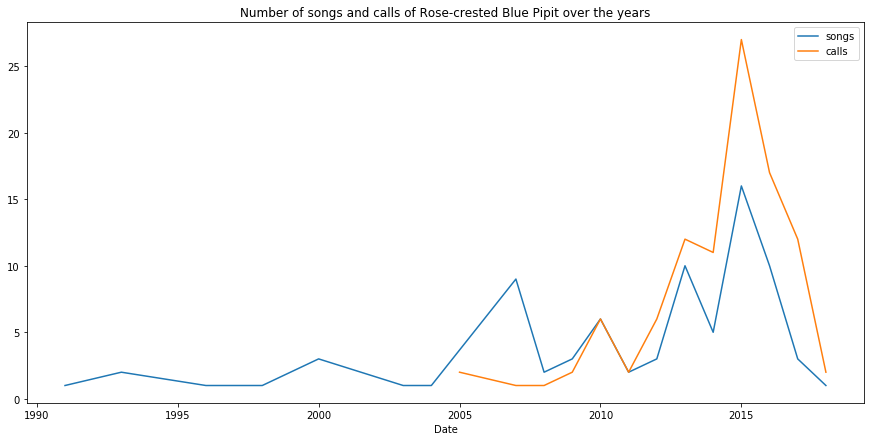

In [88]:
fig, ax = plt.subplots(figsize=(15,7))
data[(data["English_name"]== "Rose-crested Blue Pipit") & (data["Vocalization_type"]== "SONG")].groupby("Date").count()["File ID"].plot(ax=ax,label='songs')
data[(data["English_name"]== "Rose-crested Blue Pipit") & (data["Vocalization_type"]== "CALL")].groupby("Date").count()["File ID"].plot(ax=ax, label='calls')
plt.legend()
plt.title('Number of songs and calls of Rose-crested Blue Pipit over the years')
plt.show()

<div class="alert alert-info" >  
**Comments: **    

- The number of sightings of the Pipit shows an overall decreasing trend since 2015. And the analysis until now indicates that Kasios might be hiding the truth for their own interests.   

- Number of bird calls show an increasing trend. Although, in itself this is not a sufficient proof that there is something wrong with the Pipits, it definitely is an indication of unusual behavior of the birds.  

$\rightarrow$ The reason why we want to closely look for the vocalization type, based on some refrences, is that call can seldom be interpreted as sign of distress from birds, and one of the sign that should be look for. Since it matchs with our finding earlier, this can indicate that the Rose-crested Blue Pipit population may be indeed in stressed conditions.
</div>

## Next step to be taken : Audio visualization. 

Next notebook